In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('owid-covid-data.csv')
import matplotlib.pyplot as plt
%matplotlib inline
df = df.loc[df['continent'] == "Asia"]

In [2]:
len(df['location'].unique())

51

In [3]:
len(df['male_smokers'].unique())


38

In [4]:
df['male_smokers'] = df['male_smokers'].fillna(0)
df = df.loc[df['male_smokers'] != 0]
len(df['male_smokers'].unique())

37

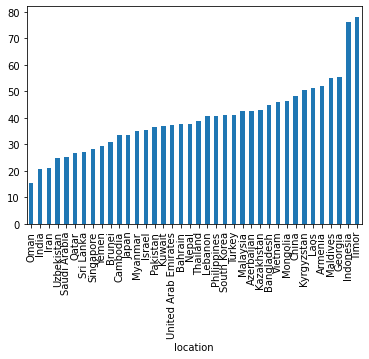

In [5]:
data_ms = df.groupby(['location']).mean()['male_smokers']
data_index = df.groupby(['location']).mean()['human_development_index']
data_poverty = df.groupby(['location']).mean()['extreme_poverty']
data_65 = df.groupby(['location']).mean()['aged_65_older']
data_70 = df.groupby(['location']).mean()['aged_70_older'] 
data_diabet = df.groupby(['location']).mean()['diabetes_prevalence'] 
data_hand = df.groupby(['location']).mean()['handwashing_facilities']
data_hospital = df.groupby(['location']).mean()['hospital_beds_per_thousand']
data_life= df.groupby(['location']).mean()['life_expectancy']
data_gdp = df.groupby(['location']).mean()['gdp_per_capita']
data_age = df.groupby(['location']).mean()['median_age']
sort_data_ms = data_ms.sort_values()
sort_data_ms.plot.bar(x='location', y='male_smokers')
plt.show()

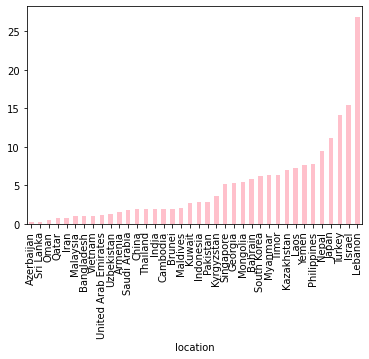

In [6]:
data_fms = df.groupby(['location']).mean()['female_smokers']
data_fms.columns =['location', 'female_smokers']
sort_data_fms = data_fms.sort_values()
sort_data_fms.plot.bar(x='location', y='female_smokers',color = 'pink')
plt.show()

/tmp/ipykernel_7347/1272230856.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  data_death = df.groupby(['location']).max()['new']


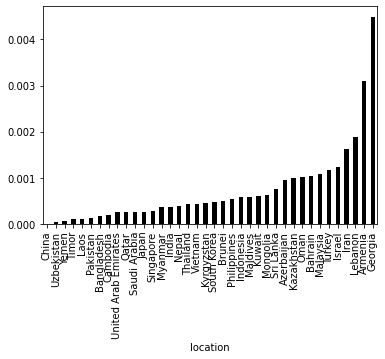

In [7]:
df['new'] = df['total_deaths']/df['population']
data_death = df.groupby(['location']).max()['new']
data_death.columns =['location', 'total_deaths']
sort_data_death = data_death.sort_values()
sort_data_death.plot.bar(x='location', y='total_deaths',color = 'black')
plt.show()

In [8]:
data = pd.DataFrame({'female_smokers': data_fms, 'male_smokers': data_ms,'total_deaths' : data_death, 
        'human_development_index' : data_index, 'extreme_poverty' : data_poverty,'diabetes_prevalence': data_diabet, 'aged_65_older' : data_65
                    ,'aged_70_older' : data_70, 'hospital_beds_per_thousand' : data_hospital, 'handwashing_facilities': data_hand
                    ,'life_expectancy' : data_life, 'gdp_per_capita' : data_gdp, 'median_age' : data_age}).reset_index()
data.isnull().sum()

location                       0
female_smokers                 0
male_smokers                   0
total_deaths                   0
human_development_index        0
extreme_poverty               15
diabetes_prevalence            0
aged_65_older                  0
aged_70_older                  0
hospital_beds_per_thousand     1
handwashing_facilities        18
life_expectancy                0
gdp_per_capita                 0
median_age                     0
dtype: int64

In [9]:
data.dropna(subset=['hospital_beds_per_thousand'], inplace=True)
data.isnull().sum()

location                       0
female_smokers                 0
male_smokers                   0
total_deaths                   0
human_development_index        0
extreme_poverty               14
diabetes_prevalence            0
aged_65_older                  0
aged_70_older                  0
hospital_beds_per_thousand     0
handwashing_facilities        18
life_expectancy                0
gdp_per_capita                 0
median_age                     0
dtype: int64

coefficient pp-pppp-of determination: 0.012342304373284319


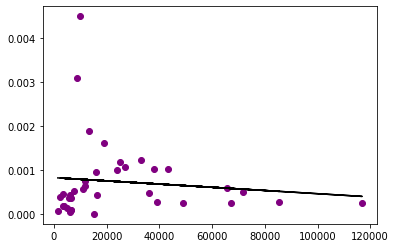

In [10]:
from sklearn.linear_model import LinearRegression
data['smokers'] = (data['male_smokers'] + data['female_smokers']) /2
x2 = data['gdp_per_capita'].values.reshape((-1,1))
y2 = data['total_deaths'].values
model = LinearRegression()
model.fit(x2, y2)
r_sq = model.score(x2, y2)
print('coefficient pp-pppp-of determination:', r_sq)
plt.scatter(x2, y2,color = 'purple')
plt.plot(x2, model.predict(x2), color='black')

In [11]:
data['human_development_index'] = data['human_development_index']*100
x4 = data[['aged_70_older', 'human_development_index','diabetes_prevalence', 'gdp_per_capita']]
y4 = data['total_deaths']*10000
data

,location,female_smokers,male_smokers,total_deaths,human_development_index,extreme_poverty,diabetes_prevalence,aged_65_older,aged_70_older,hospital_beds_per_thousand,handwashing_facilities,life_expectancy,gdp_per_capita,median_age,smokers
0,Armenia,1.5,52.1,0.003094,77.6,1.8,7.11,11.232,7.571,4.20,94.043,75.09,8787.580,35.7,26.80
1,Azerbaijan,0.3,42.5,0.000946,75.6,NaN,7.11,6.018,3.871,4.70,83.241,73.00,15847.419,32.4,21.40
2,Bahrain,5.8,37.6,0.001033,85.2,NaN,16.52,2.372,1.387,2.00,NaN,77.29,43290.705,32.4,21.70
3,Bangladesh,1.0,44.7,0.000173,63.2,14.8,8.38,5.098,3.262,0.80,34.808,72.59,3523.984,27.5,22.85
4,Brunei,2.0,30.9,0.000505,83.8,NaN,12.79,4.591,2.382,2.70,NaN,75.86,71809.251,32.4,16.45
5,Cambodia,2.0,33.7,0.000184,59.4,NaN,4.00,4.412,2.385,0.80,66.229,69.82,3645.070,25.6,17.85
6,China,1.9,48.4,0.000004,76.1,0.7,9.74,10.641,5.929,4.34,NaN,76.91,15308.712,38.7,25.15
7,Georgia,5.3,55.5,0.004489,81.2,4.2,7.11,14.864,10.244,2.60,NaN,73.77,9745.079,38.7,30.40
8,India,1.9,20.6,0.000374,64.5,21.2,10.39,5.989,3.414,0.53,59.550,69.66,6426.674,28.2,11.25
9,Indonesia,2.8,76.1,0.000574,71.8,5.7,6.32,5.319,3.053,1.04,64.204,71.72,11188.744,29.3,39.45


In [12]:
from sklearn.model_selection import train_test_split
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(x4_train, y4_train)
coeff_df = pd.DataFrame(regressor.coef_, x4.columns, columns=['Coefficient'])
coeff_df

,Coefficient
aged_70_older,0.527609
human_development_index,0.372702
diabetes_prevalence,0.375497
gdp_per_capita,-0.000179


In [13]:
from sklearn.metrics import r2_score
y_pred = regressor.predict(x4_test)


In [14]:

end = pd.DataFrame({'Actual': y4_test, 'Predicted': y_pred})
end

,Actual,Predicted
23,10.237871,7.225675
21,3.612396,2.281625
16,1.019521,2.605436
10,16.174187,9.223831
32,1.006857,3.163317
29,4.851231,12.986608
15,4.581982,7.737000
11,12.268862,12.911724


/home/olya/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/olya/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


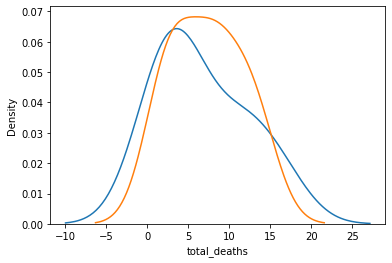

In [15]:
import seaborn as sns
g = sns.distplot(y4_test,hist = False)
g = sns.distplot(y_pred,hist = False)

In [16]:
r2_score(y4_test,y_pred)

0.3367366239836864

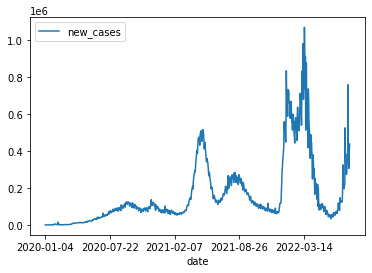

In [17]:
cases = df.groupby(['date']).sum()['new_cases'].reset_index()
cases.columns =['date', 'new_cases']
cases.plot(x = 'date', y = 'new_cases')
plt.show()

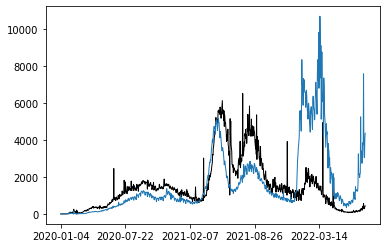

In [18]:
import matplotlib.ticker as ticker
new_death = df.groupby(['date']).sum()['new_deaths'].reset_index()
new_death.columns =['date', 'new_deaths']
x = cases['date']
y1 = cases['new_cases']/100
y2 = new_death['new_deaths']
fig, ax = plt.subplots()


ax.plot(x, y2, color = 'black', linewidth = 1)
ax.plot(x, y1,  linewidth = 1)
#  Устанавливаем интервал основных делений:
ax.xaxis.set_major_locator(ticker.MultipleLocator(200))


fig.set_figwidth(6)
fig.set_figheight(4)

plt.savefig('asiaa.png')